# Stock prediction

In [1]:
import pandas as pd

In [2]:
# Load the data

data =  pd.read_csv('stock_data_filtered.csv', parse_dates=True, index_col=0)
data

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688
...,...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000,2911.075968
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000,2913.774021
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000,2913.647693


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [4]:
train = data['2000-01-03':'2019-05-16'].copy()
train

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688
...,...,...,...,...,...,...,...
2019-05-10,2863.100098,2891.310059,2825.389893,2881.399902,2881.399902,3529600000,2871.153391
2019-05-13,2840.189941,2840.189941,2801.429932,2811.870117,2811.870117,3894030000,2856.303768
2019-05-14,2820.120117,2852.540039,2820.120117,2834.409912,2834.409912,3322720000,2844.617713


In [5]:
test = data['2019-05-15': '2019-07-01'].copy()
test.head()

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen
Date,,,,,,,
2019-05-15,2820.379883,2858.679932,2815.080078,2850.959961,2850.959961,3125950000,2840.351719
2019-05-16,2855.800049,2892.149902,2855.800049,2876.320068,2876.320068,3338060000,2839.855921
2019-05-17,2858.600098,2885.479980,2854.229980,2859.530029,2859.530029,3257950000,2839.645614
2019-05-20,2841.939941,2853.860107,2831.290039,2840.229980,2840.229980,3288870000,2838.708026
2019-05-21,2854.020020,2868.879883,2854.020020,2864.360107,2864.360107,3218700000,2834.590994


Create zero mean filtered open column for train and test data

In [6]:
train['ZeroMeanFilteredOpen'] = train['FilteredOpen'] - train['FilteredOpen'].mean()
train

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen,ZeroMeanFilteredOpen
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113,-19.092654
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078,-68.560689
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516,-90.325251
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016,-142.704750
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688,-129.721079
...,...,...,...,...,...,...,...,...
2019-05-10,2863.100098,2891.310059,2825.389893,2881.399902,2881.399902,3529600000,2871.153391,1342.169625
2019-05-13,2840.189941,2840.189941,2801.429932,2811.870117,2811.870117,3894030000,2856.303768,1327.320002
2019-05-14,2820.120117,2852.540039,2820.120117,2834.409912,2834.409912,3322720000,2844.617713,1315.633947


In [7]:
test['ZeroMeanFilteredOpen'] = test['FilteredOpen'] - train['FilteredOpen'].mean()
test

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen,ZeroMeanFilteredOpen
Date,,,,,,,,
2019-05-15,2820.379883,2858.679932,2815.080078,2850.959961,2850.959961,3125950000,2840.351719,1311.367953
2019-05-16,2855.800049,2892.149902,2855.800049,2876.320068,2876.320068,3338060000,2839.855921,1310.872155
2019-05-17,2858.600098,2885.479980,2854.229980,2859.530029,2859.530029,3257950000,2839.645614,1310.661847
2019-05-20,2841.939941,2853.860107,2831.290039,2840.229980,2840.229980,3288870000,2838.708026,1309.724259
2019-05-21,2854.020020,2868.879883,2854.020020,2864.360107,2864.360107,3218700000,2834.590994,1305.607228
2019-05-22,2856.060059,2865.469971,2851.110107,2856.270020,2856.270020,3192510000,2828.357791,1299.374024
2019-05-23,2836.699951,2836.699951,2805.489990,2822.239990,2822.239990,3891980000,2822.287244,1293.303477
2019-05-24,2832.409912,2841.360107,2820.189941,2826.060059,2826.060059,2887390000,2814.062342,1285.078576
2019-05-28,2830.030029,2840.510010,2801.580078,2802.389893,2802.389893,4121410000,2801.668160,1272.684393


Scale the data

In [8]:
scaler_open = StandardScaler()
open_scaled = scaler_open.fit_transform(train['Open'].values.reshape(-1, 1))
open_scaled

array([[-0.1114101 ],
       [-0.13761036],
       [-0.24181344],
       ...,
       [ 2.41126057],
       [ 2.41174567],
       [ 2.47789075]])

In [9]:
scaler_filteredopen = StandardScaler()
filteredopen_scaled = scaler_filteredopen.fit_transform(train['FilteredOpen'].values.reshape(-1, 1))
filteredopen_scaled

array([[-0.03568282],
       [-0.12813507],
       [-0.1688115 ],
       ...,
       [ 2.4588267 ],
       [ 2.45085386],
       [ 2.44992725]])

In [10]:
scaler_zeromean = StandardScaler()
zeromean_scaled = scaler_zeromean.fit_transform(train['ZeroMeanFilteredOpen'].values.reshape(-1, 1))
zeromean_scaled

array([[-0.03568282],
       [-0.12813507],
       [-0.1688115 ],
       ...,
       [ 2.4588267 ],
       [ 2.45085386],
       [ 2.44992725]])

Prepare the training arrays

In [11]:
x_train_op = []
y_train_op = []

for i in range(2, open_scaled.reshape((1, -1)).shape[1]):
    x_train_op.append(np.array([open_scaled[i - 2].item(), open_scaled[i - 1].item()]))
    y_train_op.append(open_scaled[i])
    


In [12]:
def get_xy_data(x_train, y_train, arr):
    for i in range(2, arr.reshape((1, -1)).shape[1]):
        x_train.append(np.array([arr[i - 2].item(), arr[i - 1].item()]))
        y_train.append(arr[i])
    return np.array(x_train), np.array(y_train)

In [13]:
x_train_op, y_train_op = get_xy_data([], [], open_scaled)
x_train_fop, y_train_fop = get_xy_data([], [], filteredopen_scaled)
x_train_zm, y_train_zm = get_xy_data([], [], zeromean_scaled)

x_train_op = x_train_op.reshape(4871, 2, 1)
x_train_fop = x_train_fop.reshape(4871, 2, 1)
x_train_zm = x_train_zm.reshape(4871, 2, 1)

y_train_op = y_train_op.reshape(-1)
y_train_fop = y_train_fop.reshape(-1)
y_train_zm = y_train_zm.reshape(-1)

In [14]:
x_train_op.shape

(4871, 2, 1)

In [15]:
y_train_op.shape

(4871,)

In [16]:
# LSTM model for open scaled training

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(2, 1)))
model.add(Dropout(.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 2, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [18]:
model.fit(x_train_op, y_train_op, batch_size=32, epochs=40)

Epoch 1/40
153/153 [==============================] - 4s 4ms/step - loss: 0.2165
Epoch 2/40
153/153 [==============================] - 1s 4ms/step - loss: 0.0189
Epoch 3/40
153/153 [==============================] - 1s 4ms/step - loss: 0.0176
Epoch 4/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0161
Epoch 5/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0154
Epoch 6/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0150
Epoch 7/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0148
Epoch 8/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0143
Epoch 9/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0147
Epoch 10/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0147
Epoch 11/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 12/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0146
Epoch 13/40
153/153 [====

In [19]:
test_open_scaled = scaler_open.transform(test['Open'].values.reshape(-1, 1))

x_test_op, _ = get_xy_data([], [], test_open_scaled)

x_test_op = x_test_op.reshape(31, 2, 1)

In [20]:
open_pred = model.predict(x_test_op)
open_pred = scaler_open.inverse_transform(open_pred)

1/1 [==============================] - 1s 601ms/step


In [21]:
df_open_pred = pd.DataFrame(index=test.index[2:])
df_open_pred['Open_pred'] = open_pred
df_open_pred.head()

,Open_pred
Date,
2019-05-17,2791.484131
2019-05-20,2810.095215
2019-05-21,2806.916016
2019-05-22,2801.894287
2019-05-23,2808.509766


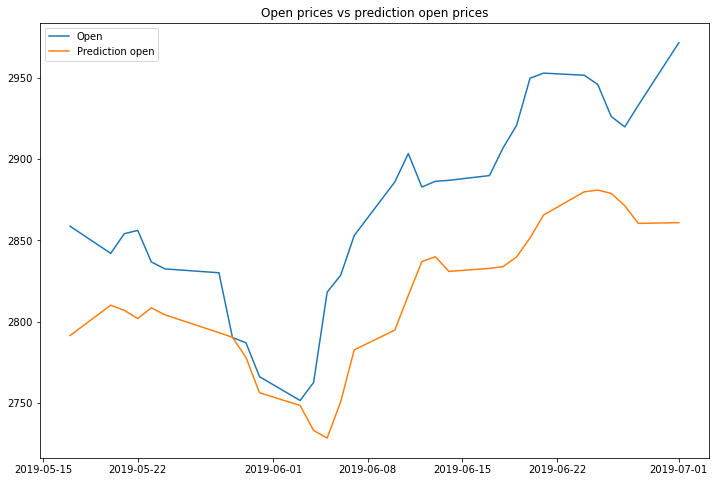

In [22]:
fig = plt.figure(figsize=(12, 8))
plt.plot(test['Open'].iloc[2:], label = 'Open')
plt.plot(df_open_pred['Open_pred'], label = 'Prediction open')
plt.title('Open prices vs prediction open prices')
plt.legend()
plt.show()

In [23]:
## LSTM model for filtered open scaled training


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(2, 1)))
model.add(Dropout(.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 50)             10400     
                                                                 
 dropout_2 (Dropout)         (None, 2, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train_fop, y_train_fop, batch_size=32, epochs=40)

Epoch 1/40
153/153 [==============================] - 3s 5ms/step - loss: 0.1720
Epoch 2/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0166
Epoch 3/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0162
Epoch 4/40
153/153 [==============================] - 1s 4ms/step - loss: 0.0146
Epoch 5/40
153/153 [==============================] - 1s 4ms/step - loss: 0.0136
Epoch 6/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0135
Epoch 7/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0141
Epoch 8/40
153/153 [==============================] - 1s 6ms/step - loss: 0.0139
Epoch 9/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0127
Epoch 10/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0135
Epoch 11/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0137
Epoch 12/40
153/153 [==============================] - 1s 5ms/step - loss: 0.0136
Epoch 13/40
153/153 [====

In [25]:
test_fopen_scaled = scaler_filteredopen.transform(test['FilteredOpen'].values.reshape(-1, 1))

x_test_fop, _ = get_xy_data([], [], test_fopen_scaled)

x_test_fop = x_test_op.reshape(31, 2, 1)

In [26]:
fopen_pred = model.predict(x_test_fop)
fopen_pred = scaler_open.inverse_transform(fopen_pred)

1/1 [==============================] - 1s 704ms/step


In [27]:
df_fopen_pred = pd.DataFrame(index=test.index[2:])
df_fopen_pred['Filtered_Open_pred'] = fopen_pred
df_fopen_pred.head()

,Filtered_Open_pred
Date,
2019-05-17,2774.889893
2019-05-20,2793.848145
2019-05-21,2791.199707
2019-05-22,2785.615967
2019-05-23,2792.316895


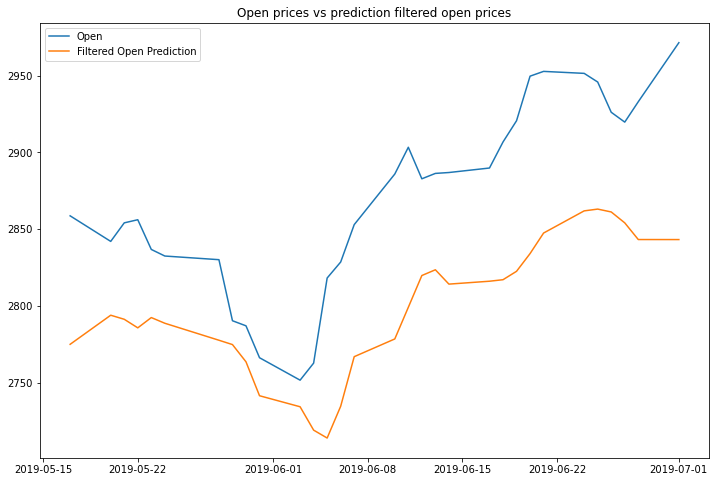

In [28]:
fig = plt.figure(figsize=(12, 8))
plt.plot(test['Open'].iloc[2:], label = 'Open')
plt.plot(df_fopen_pred['Filtered_Open_pred'], label = 'Filtered Open Prediction')
plt.title('Open prices vs prediction filtered open prices')
plt.legend()
plt.show()

In [29]:
# LSTM model for zero mean open scaled training

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(2, 1)))
model.add(Dropout(.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_zm, y_train_zm, batch_size=32, epochs=40)

test_zm_scaled = scaler_zeromean.transform(test['ZeroMeanFilteredOpen'].values.reshape(-1, 1))

x_test_zm, _ = get_xy_data([], [], test_zm_scaled)

x_test_zm = x_test_zm.reshape(31, 2, 1)

zm_pred = model.predict(x_test_zm)
zm_pred = scaler_zeromean.inverse_transform(zm_pred)

df_zm_pred = pd.DataFrame(index=test.index[2:])
df_zm_pred['ZeroMean_Open_pred'] = zm_pred
df_zm_pred.head()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 50)             10400     
                                                                 
 dropout_4 (Dropout)         (None, 2, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
153/153 [==============================

,ZeroMean_Open_pred
Date,
2019-05-17,1289.652832
2019-05-20,1289.321045
2019-05-21,1288.950562
2019-05-22,1287.314819
2019-05-23,1283.332397


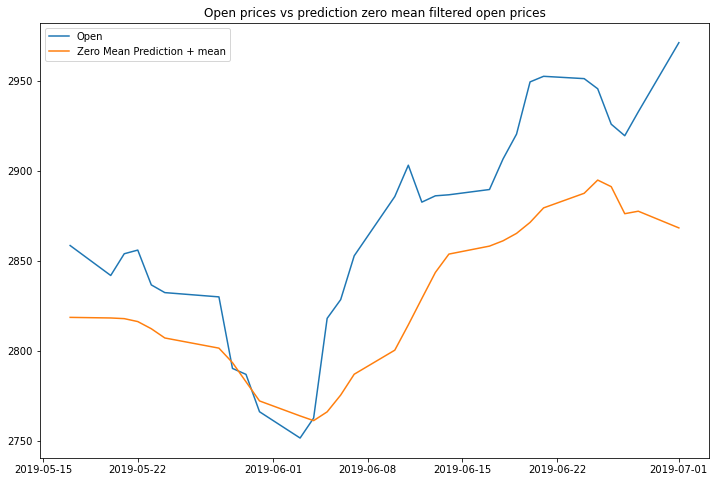

In [30]:
fig = plt.figure(figsize=(12, 8))
plt.plot(test['Open'].iloc[2:], label = 'Open')
plt.plot(df_zm_pred['ZeroMean_Open_pred'] + train['FilteredOpen'].mean(), label = 'Zero Mean Prediction + mean')
plt.title('Open prices vs prediction zero mean filtered open prices')
plt.legend()
plt.show()

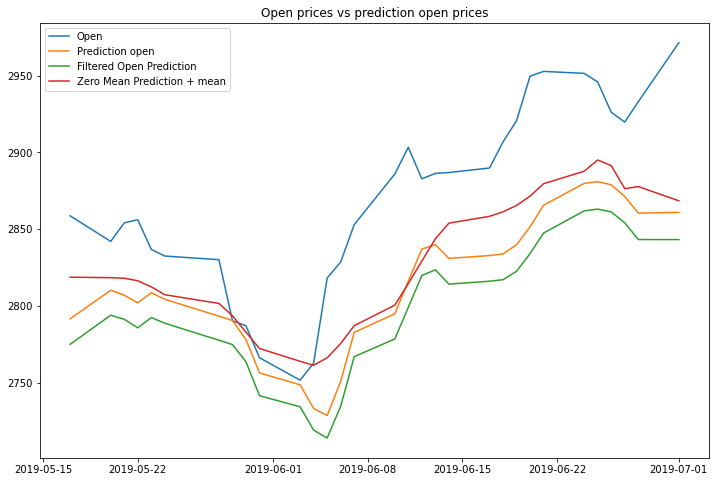

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.plot(test['Open'].iloc[2:], label = 'Open')
plt.plot(df_open_pred['Open_pred'], label = 'Prediction open')
plt.plot(df_fopen_pred['Filtered_Open_pred'], label = 'Filtered Open Prediction')
plt.plot(df_zm_pred['ZeroMean_Open_pred'] + train['FilteredOpen'].mean(), label = 'Zero Mean Prediction + mean')
plt.title('Open prices vs prediction open prices')
plt.legend()
plt.show()